In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Who are on the titanic

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

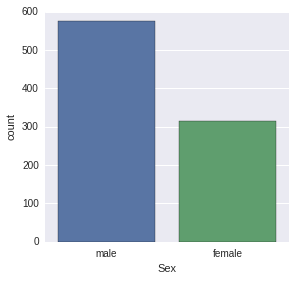

In [6]:
sns.factorplot('Sex',data=titanic_df,kind="count")

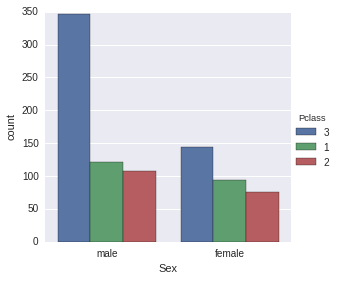

In [7]:
sns.factorplot('Sex',data=titanic_df,kind="count",hue='Pclass')

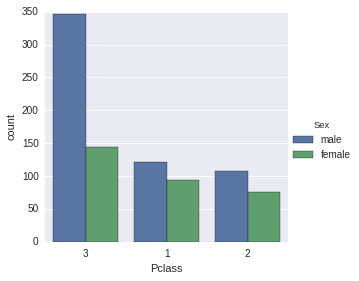

In [24]:
sns.factorplot('Pclass',data=titanic_df,kind="count",hue='Sex')

In [25]:
def male_female_child(passenger):
    age,sex = passenger
    if(age<16):
        return "child"
    else:
        return sex

In [26]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

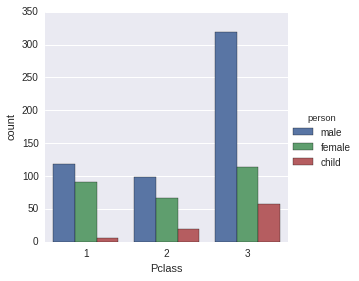

In [35]:
sns.factorplot('Pclass',data=titanic_df,kind="count",hue='person',order=[1,2,3])

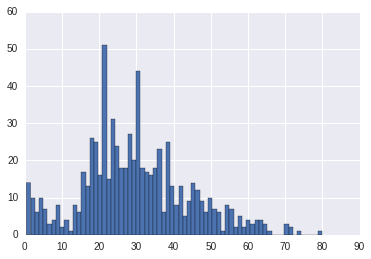

In [42]:
titanic_df['Age'].hist(bins=70)

In [39]:
titanic_df['Age'].mean()

29.69911764705882

In [40]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
dtype: int64

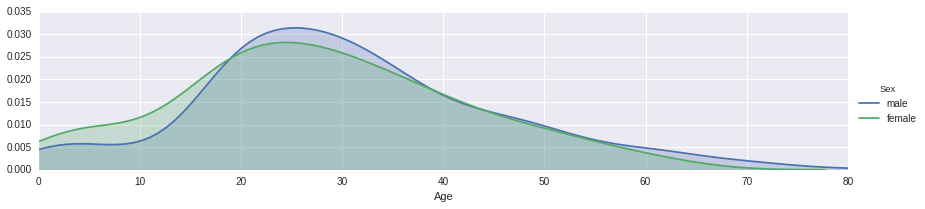

In [44]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

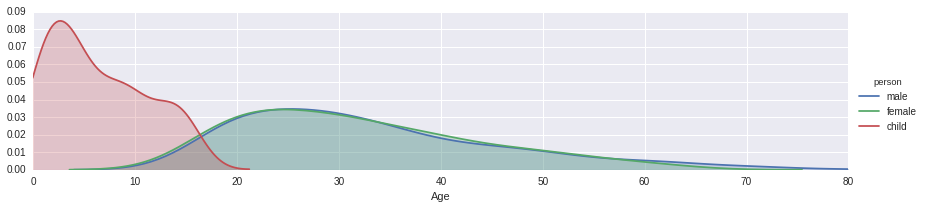

In [45]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

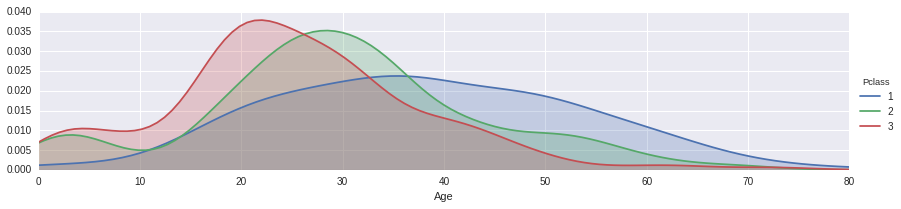

In [47]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4,hue_order=[1,2,3])
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

In [9]:
deck = titanic_df['Cabin'].dropna()

In [10]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

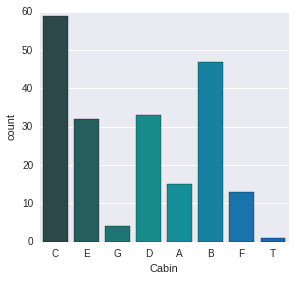

In [11]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns =  ['Cabin']
sns.factorplot('Cabin',data=cabin_df,kind="count",palette = 'winter_d')

In [12]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

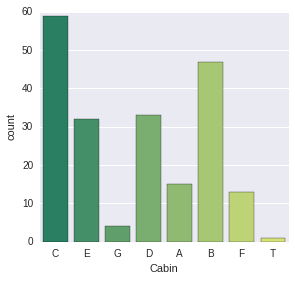

In [13]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns =  ['Cabin']
sns.factorplot('Cabin',data=cabin_df,kind="count",palette = 'summer')  

In [63]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


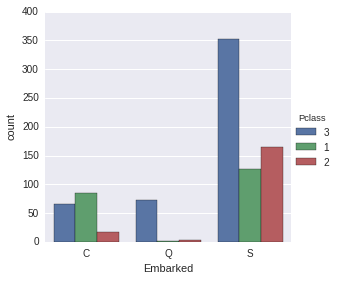

In [67]:
sns.factorplot('Embarked',data=titanic_df,hue = 'Pclass',kind="count",x_order=['C','Q','S'])

who was alone and who was with family

In [68]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [72]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

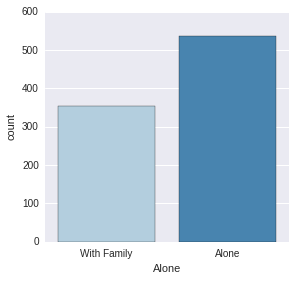

In [74]:
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind="count")

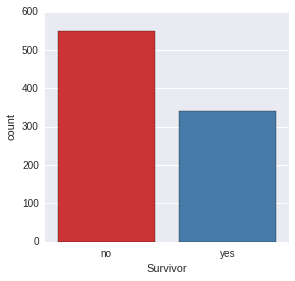

In [78]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
sns.factorplot('Survivor',data=titanic_df,palette='Set1',kind="count")

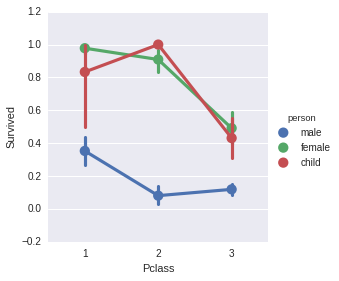

In [82]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df,order=[1,2,3])

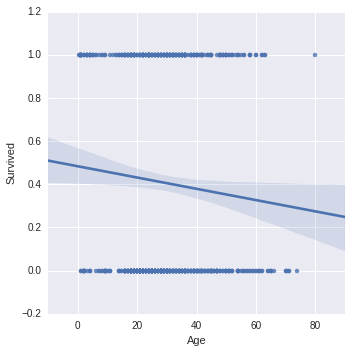

In [83]:
sns.lmplot('Age','Survived',data=titanic_df)

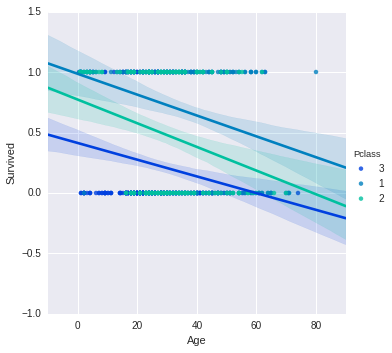

In [86]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

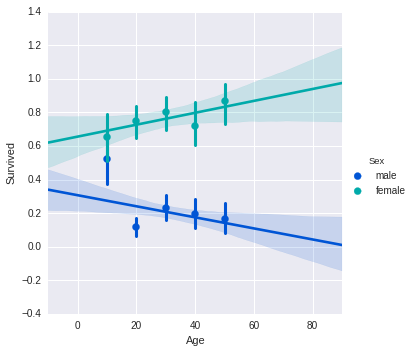

In [88]:
generations = [10,20,30,40,50]
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)